<div style="text-align: right">
<font color="#000000" size=4>José María García García</font>
</div>


<br><br><br>
<h2><font color="#004D7F" size=5>MUII</font></h2>



<h1><font color="#004D7F" size=6>Práctica de análisis de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Maite Alonso</font><br>
<font color="#004D7F" size=3>Universidad de Castilla-La Mancha</font>

</div>



---

<a id="section1"></a>
# <font color="#004D7F"> 1. Banco de datos</font>

La base de datos hsb2 es una colección de información sobre 200 escolares:

*	Id, identificador del alumno
*	Gender, sexo, male o female.
*	Race, la raza que está dividida en african american, asian, hispanic, and white
*	Ses, nivel socieconómico, low, middle, high
*	Schtyp, tipo escuela publica o privada.
*	Prog, tipo de programa, general, académico o vocacional.
*	Read, nota en lectura
*	Write, nota en escritura
*	Math, nota en matemáticas
*	Science, nota en ciencia
*	Socst, nota en sociales

Preguntas:

1.	¿De qué tipo son las variables?
2.  Haz un análisis descriptivo de las notas. Saca los principales estadísticos y comenta sus valores.
3.	Representa gráficamente la proporción de individuos por raza, por sexo, por nivel socieconómico y por tipo de programa.
4.  ¿Hay alguna relación entre el nivel socieconómico y el tipo de escuela al que acuden los alumnos?
5.	Compara mediante un gráfico las notas en read, write,math, science, socst.
6.  Tiene algo que ver el nivel socieconómico en alguna de las notas.
7.  Y el tipo de escuela. ¿ tiene algo que ver el tipo de escuela con las notas en las distintas asignaturas?
8. ¿Hay relación entre la variable sexo y las notas en matemáticas?. 
9. Compara las notas medias de todas las asignaturas por nivel socieconómico y por le tipo de escuela.
10. Con el análisis exploratorio que hemos hecho dle banco de datos, ¿ a qué conclusiones llegamos?

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

#cargo los datos
df = pd.read_csv("./hsb2.csv",sep=',')
df.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


<h4>1. ¿De qué tipo son las variables?</h4>
<ul>
    <li>gender - cualitativo</li>
    <li>race - cualitativo</li>
    <li>ses - cualitativo</li>
    <li>schtyp - cualitativo</li>
    <li>prog - cualitativo</li>
    <li>read - cuantitativo discreto</li>
    <li>write - cuantitativo discreto</li>
    <li>math - cuantitativo discreto</li>
    <li>science - cuantitativo discreto</li>
    <li>socst - cuantitativo discreto</li>
</ul>

<h4>2. Haz un análisis descriptivo de las notas. Saca los principales estadísticos y comenta sus valores.</h4>

In [3]:
df.describe()

,id,read,write,math,science,socst
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,52.230000,52.775000,52.645000,51.850000,52.405000
std,57.879185,10.252937,9.478586,9.368448,9.900891,10.735793
min,1.000000,28.000000,31.000000,33.000000,26.000000,26.000000
25%,50.750000,44.000000,45.750000,45.000000,44.000000,46.000000
50%,100.500000,50.000000,54.000000,52.000000,53.000000,52.000000
75%,150.250000,60.000000,60.000000,59.000000,58.000000,61.000000
max,200.000000,76.000000,67.000000,75.000000,74.000000,71.000000


La muestra tiene 200 valores.

Todos los valores estadísticos calculados son muy similares, como podemos ver en el bloque anterior.

La <strong>media</strong> de todos los valores se encuentra aproximadamente en 50, presentando ademas una <strong>dispersión</strong> similar de, aproximadamente, 10 puntos. Lo mismo para con los <strong>cuartiles</strong>. La diferencia más notable está en la capacidad de escritura de los alumnos, puesto que esta es la disciplina en la que obtienen notas más bajas.

<h4>3. Representa gráficamente la proporción de individuos por raza, por sexo, por nivel socieconómico y por tipo de programa</h4>


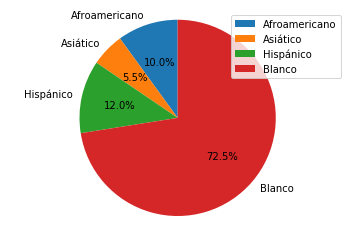

In [4]:
#Funciones auxiliares 
def df_column_count_data(df, column_k):
    return [[key, len(value)]for key, value in df.groupby(column_k)]

def pie_graph(data, labels, startangle = 90, legend = True, axis = 'equal'):
    plt.pie(data, labels = labels, autopct='%1.1f%%', startangle = startangle)
    plt.legend() if legend else False
    plt.axis(axis)
    plt.show()

column_data = df_column_count_data(df, 'race')
pie_graph([x[1] for x in column_data], ['Afroamericano', 'Asiático', 'Hispánico', 'Blanco'])

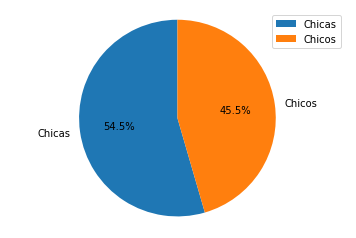

In [5]:
column_data = df_column_count_data(df, 'gender')
pie_graph([x[1] for x in column_data], ['Chicas', 'Chicos'])

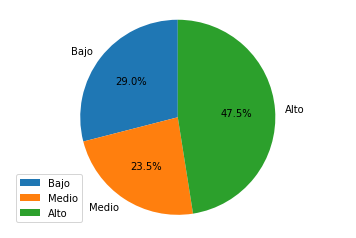

In [6]:
column_data = df_column_count_data(df, 'ses')
pie_graph([x[1] for x in column_data], ['Bajo', 'Medio', 'Alto'])

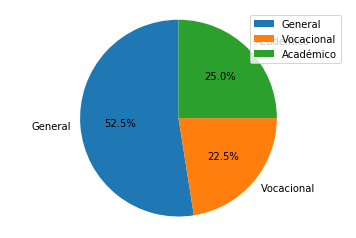

In [7]:
column_data = df_column_count_data(df, 'prog')
pie_graph([x[1] for x in column_data], ['General', 'Vocacional', 'Académico'])

<h4>4. ¿Hay alguna relación entre el nivel socieconómico y el tipo de escuela al que acuden los alumnos?</h4>

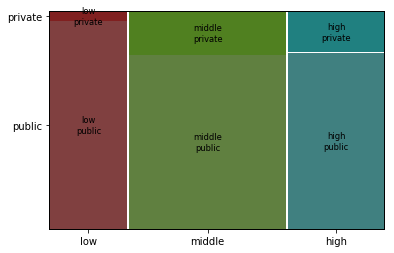

In [8]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['ses', 'schtyp'])
plt.show()

En este mosaico podemos comprobar cosas que ya esperabamos, cómo el hecho de que la mayoría de estudiantes de la escuela <strong>pública</strong> tienen un nivel socioeconómico <strong>bajo</strong> o <strong>medio</strong>. La sorpresa aparece en lo que respecta a los estudiantes de nivel socioeconómico <strong>alto</strong>, puesto que la mayoría van a escuelas <strong>públicas</strong>, en contra de los prejuicios que se puedan tener de ellos. 

<h4>5.Compara mediante un gráfico las notas en read, write,math, science, socst.</h4>

Los siguientes gráficos nos permiten comparar las notas de las asignaturas mencionadas. Ambos ponen en evidencia la regularidad de los datos. En el diagrama de puntos, dónde se ha colocado cada conjunto de notas de un alumno en una columna, vemos que existen muchas líneas rectas horizontales, lo que nos indica que muchos alumnos obtuvieron la misma nota. En el diagrama de cajas vemos también que las medianas son muy parecidas, lo que concuerda con lo que el diagrama de puntos nos deja entrever. 

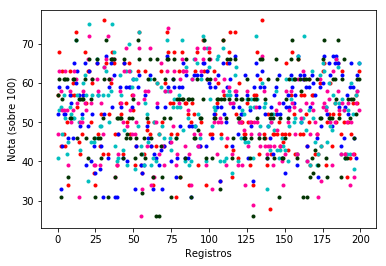

In [9]:
import numpy as np
plt.scatter(np.arange(len(df.read)), df.read.values, marker='.', c = 'r')
plt.scatter(np.arange(len(df.write)), df.write.values, marker='.', c = 'b')
plt.scatter(np.arange(len(df.math)), df.math.values, marker='.', c = 'c')
plt.scatter(np.arange(len(df.science)), df.science.values, marker='.', c = '#ff0099')
plt.scatter(np.arange(len(df.socst)), df.socst.values, marker='.', c = '#003300')

plt.xlabel('Registros')
plt.ylabel('Nota (sobre 100)')
plt.show()

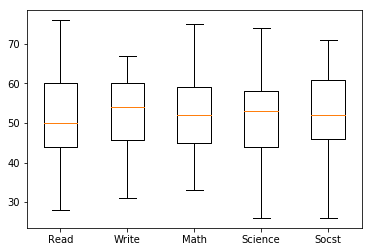

In [10]:
read=df.read
write=df.write
math=df.math
science=df.science
socst=df.socst
data=[read,write,math, science, socst]
plt.figure(3)
plt.boxplot(data)
plt.axes().set_xticklabels(['Read', 'Write', 'Math', 'Science', 'Socst'])
plt.show()

<h4>6. ¿Tiene algo que ver el nivel socieconómico en alguna de las notas?</h4>

Para estudiar la posible relación entre el nivel socioeconómico y las notas, calcularemos el <strong>coeficiente de correlación</strong> entre el nivel socioeconómico y las notas de cada asignatura, haciendo uso de la función `corrcoef` que ofrece Numpy.

In [11]:
df_rel = df.copy("True")

replace_dict = {
    "ses":{
        "low":0,
        "middle":1,
        "high":2
    },
    "schtyp":{
        "public":0,
        "private":1           
        }
}
df_rel.replace(replace_dict, inplace=True) #Tranformamos las variables categóricas ses y schtyp en números
print("Ses/Read \n " + str(np.corrcoef(df_rel.ses, df_rel.read)))
print("Ses/Write \n " + str(np.corrcoef(df_rel.ses, df_rel.write)))
print("Ses/Math \n " + str(np.corrcoef(df_rel.ses, df_rel.math)))
print("Ses/Science \n " + str(np.corrcoef(df_rel.ses, df_rel.science)))
print("Ses/Socst \n " + str(np.corrcoef(df_rel.ses, df_rel.socst)))

Ses/Read 
 [[1.         0.29332182]
 [0.29332182 1.        ]]
Ses/Write 
 [[1.         0.20749365]
 [0.20749365 1.        ]]
Ses/Math 
 [[1.         0.27245932]
 [0.27245932 1.        ]]
Ses/Science 
 [[1.         0.28285529]
 [0.28285529 1.        ]]
Ses/Socst 
 [[1.         0.33187762]
 [0.33187762 1.        ]]


Analizando los valores que arroja `corrcoef` para cada asignatura, vemos que la relación entre las notas y el nivel SE es relativamente baja.

<h4>7. Y el tipo de escuela. ¿ tiene algo que ver el tipo de escuela con las notas en las distintas asignaturas?</h4>

In [12]:
print("Schtype/Read \n " + str(np.corrcoef(df_rel.schtyp, df_rel.read)))
print("Schtype/Write \n " + str(np.corrcoef(df_rel.schtyp, df_rel.write)))
print("Schtype/Math \n " + str(np.corrcoef(df_rel.schtyp, df_rel.math)))
print("Schtype/Science \n " + str(np.corrcoef(df_rel.schtyp, df_rel.science)))
print("Schtype/Socst \n " + str(np.corrcoef(df_rel.schtyp, df_rel.socst)))

Schtype/Read 
 [[1.         0.08620092]
 [0.08620092 1.        ]]
Schtype/Write 
 [[1.         0.12722834]
 [0.12722834 1.        ]]
Schtype/Math 
 [[1.       0.098309]
 [0.098309 1.      ]]
Schtype/Science 
 [[1.         0.06462944]
 [0.06462944 1.        ]]
Schtype/Socst 
 [[1.         0.09684268]
 [0.09684268 1.        ]]


Analizando los valores que arroja `corrcoef` para cada asignatura, vemos que la relación entre las notas y el tipo de escuela es más baja aún que la relación que existía con el nivel SE.

<h4>8. ¿Hay relación entre la variable sexo y las notas en matemáticas?. </h4>

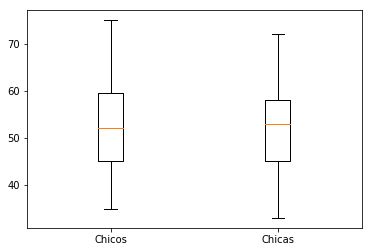

In [13]:
data=[df.math[df.gender == 'male'] , df.math[df.gender == 'female']]
plt.figure(3)
plt.boxplot(data)
plt.axes().set_xticklabels(['Chicos', 'Chicas'])
plt.show()

Aunque las medianas de ambos conjuntos de datos son casi iguales (algo mayor la de las chicas) y que los tamaños de las cajas son similares, las notas más altas las tienen los chicos.

<h4>9. Compara las notas medias de todas las asignaturas por nivel socieconómico y por le tipo de escuela.</h4>

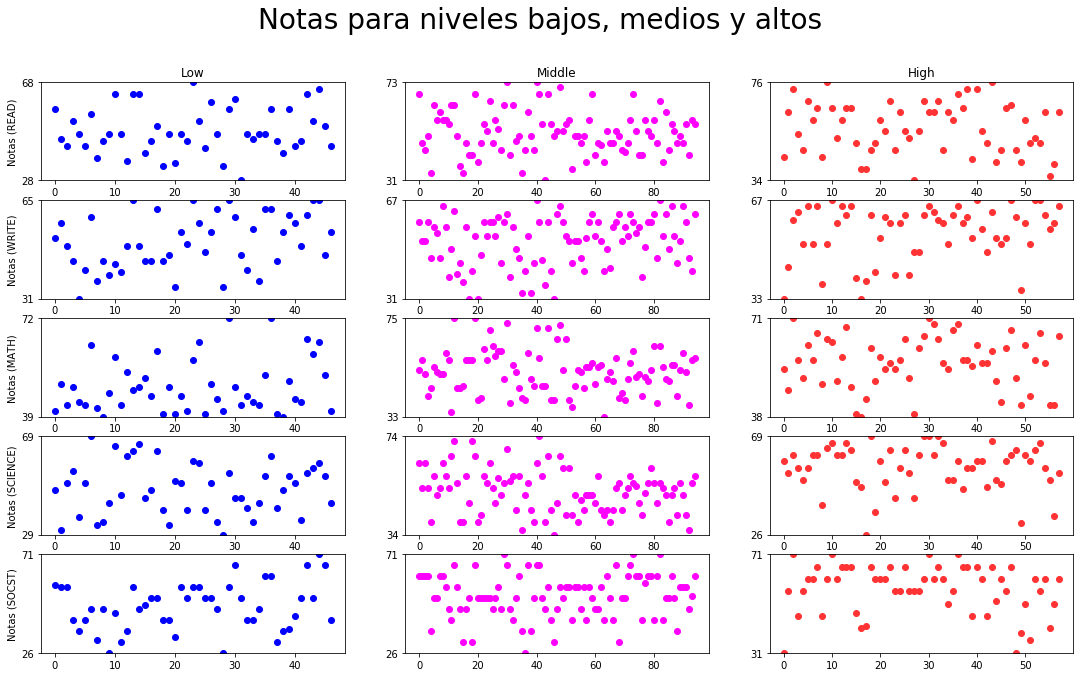

In [14]:
import numpy as np
#########FILA READ

f, axarr = plt.subplots(5, 3)
axarr[0,0].set_title("Low")
axarr[0,0].set_ylabel("Notas (READ)")
axarr[0,0].scatter(np.arange(len(df.read[df.ses == 'low'])), df.read[df.ses == 'low'], marker='o', c = '#0000ff') #azul oscuro
axarr[0,0].set_ylim(min(df.read[df.ses == 'low'].values), max(df.read[df.ses == 'low'].values))    
axarr[0,0].set_yticks([min(df.read[df.ses == 'low'].values), max(df.read[df.ses == 'low'].values)])    

axarr[0,1].set_title("Middle")
axarr[0,1].scatter(np.arange(len(df.read[df.ses == 'middle'])), df.read[df.ses == 'middle'], marker='o', c = '#ff00ff') #rosa
axarr[0,1].set_ylim(min(df.read[df.ses == 'middle'].values), max(df.read[df.ses == 'middle'].values))
axarr[0,1].set_yticks([min(df.read[df.ses == 'middle'].values), max(df.read[df.ses == 'middle'].values)])

axarr[0,2].set_title("High")
axarr[0,2].scatter(np.arange(len(df.read[df.ses == 'high'])), df.read[df.ses == 'high'], marker='o', c = '#ff3333') #rojo
axarr[0,2].set_ylim(min(df.read[df.ses == 'high'].values), max(df.read[df.ses == 'high'].values))
axarr[0,2].set_yticks([min(df.read[df.ses == 'high'].values), max(df.read[df.ses == 'high'].values)])

#########FILA WRITE
axarr[1,0].set_ylabel("Notas (WRITE)")
axarr[1,0].scatter(np.arange(len(df.write[df.ses == 'low'])), df.write[df.ses == 'low'], marker='o', c = '#0000ff') #azul oscuro
axarr[1,0].set_ylim(min(df.write[df.ses == 'low'].values), max(df.write[df.ses == 'low'].values))
axarr[1,0].set_yticks([min(df.write[df.ses == 'low'].values), max(df.write[df.ses == 'low'].values)])

axarr[1,1].scatter(np.arange(len(df.write[df.ses == 'middle'])), df.write[df.ses == 'middle'], marker='o', c = '#ff00ff') #rosa
axarr[1,1].set_ylim(min(df.write[df.ses == 'middle'].values), max(df.write[df.ses == 'middle'].values))
axarr[1,1].set_yticks([min(df.write[df.ses == 'middle'].values), max(df.write[df.ses == 'middle'].values)])

axarr[1,2].scatter(np.arange(len(df.write[df.ses == 'high'])), df.write[df.ses == 'high'], marker='o', c = '#ff3333') #rojo
axarr[1,2].set_ylim(min(df.write[df.ses == 'high'].values), max(df.write[df.ses == 'high'].values))
axarr[1,2].set_yticks([min(df.write[df.ses == 'high'].values), max(df.write[df.ses == 'high'].values)])

#########FILA MATH
axarr[2,0].set_ylabel("Notas (MATH)")
axarr[2,0].scatter(np.arange(len(df.math[df.ses == 'low'])), df.math[df.ses == 'low'], marker='o', c = '#0000ff') #azul oscuro
axarr[2,0].set_ylim(min(df.math[df.ses == 'low'].values), max(df.math[df.ses == 'low'].values))
axarr[2,0].set_yticks([min(df.math[df.ses == 'low'].values), max(df.math[df.ses == 'low'].values)])

axarr[2,1].scatter(np.arange(len(df.math[df.ses == 'middle'])), df.math[df.ses == 'middle'], marker='o', c = '#ff00ff') #rosa
axarr[2,1].set_ylim(min(df.math[df.ses == 'middle'].values), max(df.math[df.ses == 'middle'].values))
axarr[2,1].set_yticks([min(df.math[df.ses == 'middle'].values), max(df.math[df.ses == 'middle'].values)])

axarr[2,2].scatter(np.arange(len(df.math[df.ses == 'high'])), df.math[df.ses == 'high'], marker='o', c = '#ff3333') #rojo
axarr[2,2].set_ylim(min(df.math[df.ses == 'high'].values), max(df.math[df.ses == 'high'].values))
axarr[2,2].set_yticks([min(df.math[df.ses == 'high'].values), max(df.math[df.ses == 'high'].values)])

#########FILA SCIENCE
axarr[3,0].set_ylabel("Notas (SCIENCE)")
axarr[3,0].scatter(np.arange(len(df.science[df.ses == 'low'])), df.science[df.ses == 'low'], marker='o', c = '#0000ff') #azul oscuro
axarr[3,0].set_ylim(min(df.science[df.ses == 'low'].values), max(df.science[df.ses == 'low'].values))
axarr[3,0].set_yticks([min(df.science[df.ses == 'low'].values), max(df.science[df.ses == 'low'].values)])

axarr[3,1].scatter(np.arange(len(df.science[df.ses == 'middle'])), df.science[df.ses == 'middle'], marker='o', c = '#ff00ff') #rosa
axarr[3,1].set_ylim(min(df.science[df.ses == 'middle'].values), max(df.science[df.ses == 'middle'].values))
axarr[3,1].set_yticks([min(df.science[df.ses == 'middle'].values), max(df.science[df.ses == 'middle'].values)])

axarr[3,2].scatter(np.arange(len(df.science[df.ses == 'high'])), df.science[df.ses == 'high'], marker='o', c = '#ff3333') #rojo
axarr[3,2].set_ylim(min(df.science[df.ses == 'high'].values), max(df.science[df.ses == 'high'].values))
axarr[3,2].set_yticks([min(df.science[df.ses == 'high'].values), max(df.science[df.ses == 'high'].values)])

#FILA SOCST
axarr[4,0].set_ylabel("Notas (SOCST)")
axarr[4,0].scatter(np.arange(len(df.socst[df.ses == 'low'])), df.socst[df.ses == 'low'], marker='o', c = '#0000ff') #azul oscuro
axarr[4,0].set_ylim(min(df.socst[df.ses == 'low'].values), max(df.socst[df.ses == 'low'].values))
axarr[4,0].set_yticks([min(df.socst[df.ses == 'low'].values), max(df.socst[df.ses == 'low'].values)])

axarr[4,1].scatter(np.arange(len(df.socst[df.ses == 'middle'])), df.socst[df.ses == 'middle'], marker='o', c = '#ff00ff') #rosa
axarr[4,1].set_ylim(min(df.socst[df.ses == 'middle'].values), max(df.socst[df.ses == 'middle'].values))
axarr[4,1].set_yticks([min(df.socst[df.ses == 'middle'].values), max(df.socst[df.ses == 'middle'].values)])

axarr[4,2].scatter(np.arange(len(df.socst[df.ses == 'high'])), df.socst[df.ses == 'high'], marker='o', c = '#ff3333') #rojo
axarr[4,2].set_ylim(min(df.socst[df.ses == 'high'].values), max(df.socst[df.ses == 'high'].values))
axarr[4,2].set_yticks([min(df.socst[df.ses == 'high'].values), max(df.socst[df.ses == 'high'].values)])

plt.suptitle('Notas para niveles bajos, medios y altos', fontsize=28)
#plt.gcf().tight_layout()
#f.subplots_adjust(top=0.9)
f.set_size_inches(18.5, 10.5)
plt.show()

Axes(0.125,0.125;0.775x0.755)


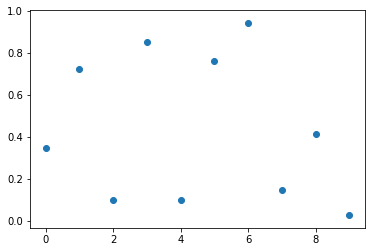

200

In [21]:
f, ax = plt.subplots()
print(ax)

def func(ax_f):
    ax_f(np.arange(10), np.random.rand(10))

func(ax.scatter)
plt.show()
len(df)

#0000ff high
#ff0000 low
#ff00ff middle


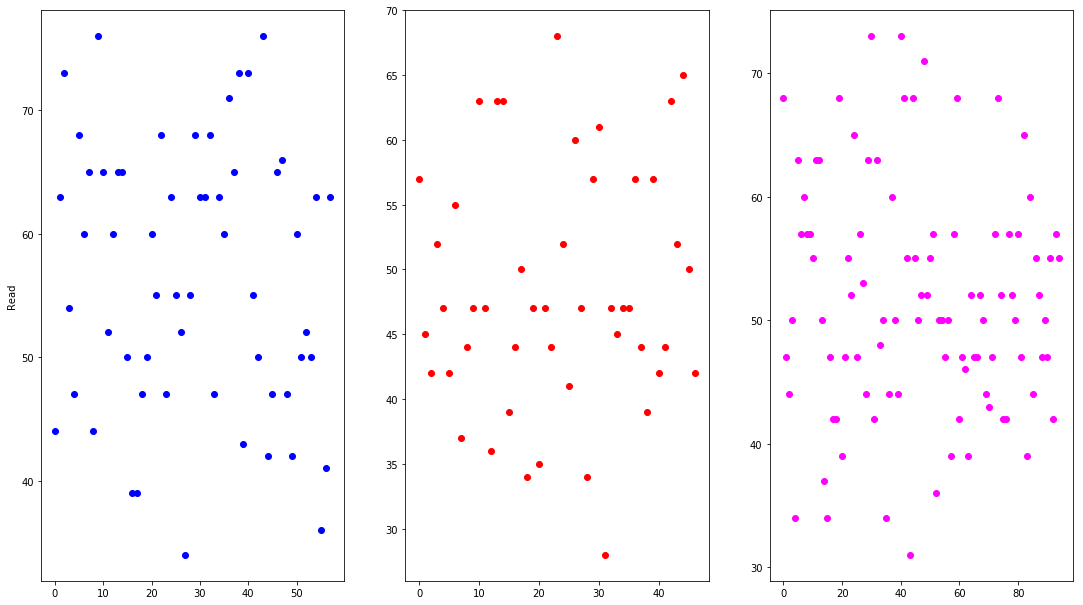

In [54]:
import numpy as np

range_len = lambda df: np.arange(len(df))

def plot_by_group(mpl_a, column_to_group, column_to_plot, colors_for_plot, xticks_f):
    for mpl_f, color, (key, sub_df) in zip(mpl_a, colors_for_plot, df.groupby(column_to_group)):
        print(color, key)
        mpl_f(xticks_f(sub_df), sub_df[column_to_plot], c = color)

#plot_by_group(plt.scatter, 'ses', 'read', ['#0000ff', '#ff0000'], range_len)

f, axarr = plt.subplots(1, 3)
plot_by_group([axarr[0].scatter, axarr[1].scatter, axarr[2].scatter], 'ses', 'read', ['#0000ff', '#ff0000',  '#ff00ff'], range_len)
axarr[0].set_ylabel('Read')
'''axarr[0,0].set_title("Low")
axarr[0,0].set_ylabel("Notas (READ)")
axarr[0,0].scatter(np.arange(len(df.read[df.ses == 'low'])), df.read[df.ses == 'low'], marker='o', c = '#0000ff') #azul oscuro
axarr[0,0].set_ylim(min(df.read[df.ses == 'low'].values), max(df.read[df.ses == 'low'].values))    
axarr[0,0].set_yticks([min(df.read[df.ses == 'low'].values), max(df.read[df.ses == 'low'].values)])    
'''
f.set_size_inches(18.5, 10.5)

plt.show()

Esta matriz de gráficos, en la cual cada registro se ha representado como una columna de puntos, nos permite apreciar, no solo tendencias y agrupaciones de datos, sino también la densidad de estudiantes de cada tipo. Vemos que los estudiantes de nivel <strong>medio</strong> son los más <strong>numerosos</strong>. Además, vemos que los de nivel <strong>medio superan o igualan</strong>  a los alumnos de nivel <strong>alto</strong> en cuestión de nota en todas las asignaturas salvo en Lectura (read). Los estudiantes de nivel bajo tampoco se quedan atrás, igualando a los de la nivel alto en Sociales y Ciencias y superándolos en Matemáticas. No obstante, si analizamos los datos en cuestión de medias (siguiente gráfico), vemos que los alumnos de nivel alto salen beneficiados, algo también más fácil de conseguir pues son menos alumnos.

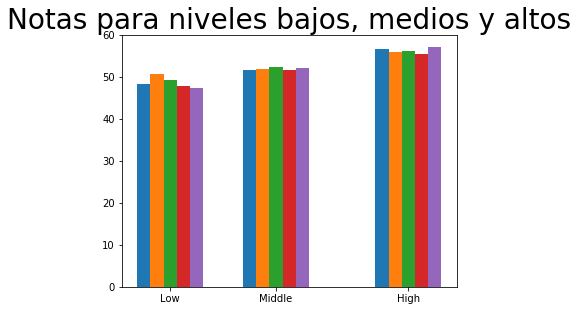

In [15]:
import numpy as np

read_l, read_m, read_h = df.read[df.ses == 'low'], df.read[df.ses == 'middle'], df.read[df.ses == 'high']
write_l, write_m, write_h = df.write[df.ses == 'low'], df.write[df.ses == 'middle'], df.write[df.ses == 'high']
math_l, math_m, math_h = df.math[df.ses == 'low'], df.math[df.ses == 'middle'], df.math[df.ses == 'high']
science_l, science_m, science_h = df.science[df.ses == 'low'], df.science[df.ses == 'middle'], df.science[df.ses == 'high']
socst_l, socst_m, socst_h = df.socst[df.ses == 'low'], df.socst[df.ses == 'middle'], df.socst[df.ses == 'high']

bar_w = 0.5
xticks = np.array([1, 5, 10]) 
plt.bar(xticks, [np.mean(read_l), np.mean(read_m), np.mean(read_h)], width=bar_w)
plt.bar(xticks + bar_w, [np.mean(write_l), np.mean(write_m), np.mean(write_h)], width=bar_w)
plt.bar(xticks + bar_w*2, [np.mean(math_l), np.mean(math_m), np.mean(math_h)], width=bar_w)
plt.bar(xticks + bar_w*3, [np.mean(science_l), np.mean(science_m), np.mean(science_h)], width=bar_w)
plt.bar(xticks + bar_w*4, [np.mean(socst_l), np.mean(socst_m), np.mean(socst_h)], width=bar_w)

plt.axes().set_xticks(xticks + bar_w*2)
plt.axes().set_xticklabels(['Low', 'Middle', 'High'])

#0000ff #azul oscuro
#ff00ff #rosa
 #ff3333 #rojo
plt.title('Notas para niveles bajos, medios y altos', fontsize=28)
plt.gcf().subplots_adjust(top=1)
plt.show()

A continuación usaremos los mismos tipo de gráficos para considerar a los alumnos de escuelas públicas y privadas.

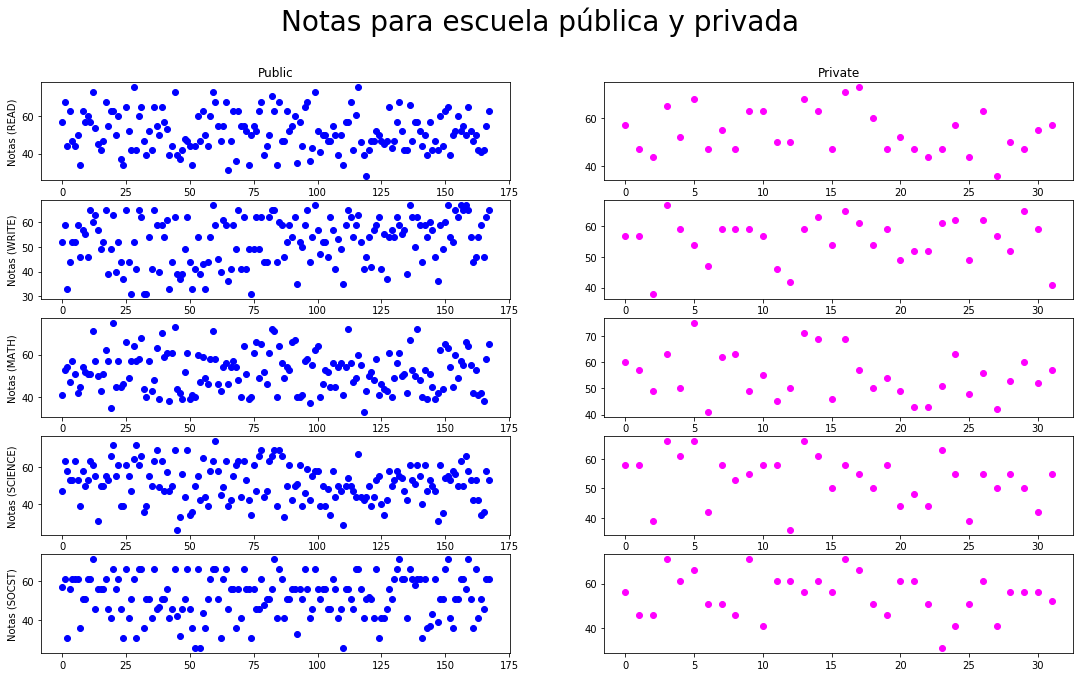

In [16]:
import numpy as np
#########FILA READ
f, axarr = plt.subplots(5, 2)
axarr[0,0].set_title("Public")
axarr[0,0].set_ylabel("Notas (READ)")
axarr[0,0].scatter(np.arange(len(df.read[df.schtyp == 'public'])), df.read[df.schtyp == 'public'], marker='o', c = '#0000ff') #azul oscuro

axarr[0,1].set_title("Private")
axarr[0,1].scatter(np.arange(len(df.read[df.schtyp == 'private'])), df.read[df.schtyp == 'private'], marker='o', c = '#ff00ff') #rosa

#########FILA WRITE
axarr[1,0].set_ylabel("Notas (WRITE)")
axarr[1,0].scatter(np.arange(len(df.write[df.schtyp == 'public'])), df.write[df.schtyp == 'public'], marker='o', c = '#0000ff') #azul oscuro

axarr[1,1].scatter(np.arange(len(df.write[df.schtyp == 'private'])), df.write[df.schtyp == 'private'], marker='o', c = '#ff00ff') #rosa

#########FILA MATH
axarr[2,0].set_ylabel("Notas (MATH)")
axarr[2,0].scatter(np.arange(len(df.math[df.schtyp == 'public'])), df.math[df.schtyp == 'public'], marker='o', c = '#0000ff') #azul oscuro

axarr[2,1].scatter(np.arange(len(df.math[df.schtyp == 'private'])), df.math[df.schtyp == 'private'], marker='o', c = '#ff00ff') #rosa



#########FILA SCIENCE
axarr[3,0].set_ylabel("Notas (SCIENCE)")
axarr[3,0].scatter(np.arange(len(df.science[df.schtyp == 'public'])), df.science[df.schtyp == 'public'], marker='o', c = '#0000ff') #azul oscuro

axarr[3,1].scatter(np.arange(len(df.science[df.schtyp == 'private'])), df.science[df.schtyp == 'private'], marker='o', c = '#ff00ff') #rosa


#FILA SOCST
axarr[4,0].set_ylabel("Notas (SOCST)")
axarr[4,0].scatter(np.arange(len(df.socst[df.schtyp == 'public'])), df.socst[df.schtyp == 'public'], marker='o', c = '#0000ff') #azul oscuro

axarr[4,1].scatter(np.arange(len(df.socst[df.schtyp == 'private'])), df.socst[df.schtyp == 'private'], marker='o', c = '#ff00ff') #rosa

plt.suptitle(r'Notas para escuela pública y privada', fontsize=28)

f.set_size_inches(18.5, 10.5)
plt.show()

La diferencia de densidad de alumnos en este caso es muy grande. Si comparamos las notas en cuestion de medias (siguiente gráfica), vemos que los estudiantes de escuela privada quedan ligeramente por encima, pero la diferencia es mínima respecto a los de escuela pública.

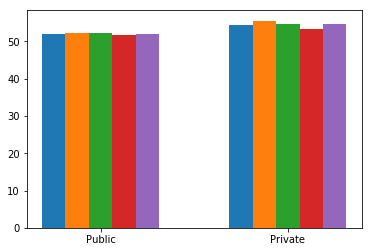

In [17]:
import numpy as np

read_public, read_private = df.read[df.schtyp == 'public'], df.read[df.schtyp == 'private']
write_public, write_private = df.write[df.schtyp == 'public'], df.write[df.schtyp == 'private']
math_public, math_private = df.math[df.schtyp == 'public'], df.math[df.schtyp == 'private']
science_public, science_private = df.science[df.schtyp == 'public'], df.science[df.schtyp == 'private']
socst_public, socst_private = df.socst[df.schtyp == 'public'], df.socst[df.schtyp == 'private']

bar_w = 0.5
xticks = np.array([1, 5]) 
plt.bar(xticks, [np.mean(read_public), np.mean(read_private)], width=bar_w)
plt.bar(xticks + bar_w, [np.mean(write_public), np.mean(write_private)], width=bar_w)
plt.bar(xticks + bar_w*2, [np.mean(math_public), np.mean(math_private)], width=bar_w)
plt.bar(xticks + bar_w*3, [np.mean(science_public), np.mean(science_private)], width=bar_w)
plt.bar(xticks + bar_w*4, [np.mean(socst_public), np.mean(socst_private)], width=bar_w)
plt.axes().set_xticks(xticks + bar_w*2)
plt.axes().set_xticklabels(['Public', 'Private'])

#0000ff #azul oscuro
#ff00ff #rosa
 #ff3333 #rojob
plt.show()

<h4>10. Con el análisis exploratorio que hemos hecho del banco de datos, ¿ a qué conclusiones llegamos? </h4> <br/>
En cuestión de notas, el análisis de los datos nos ha permitido desmentir varios mitos o prejuicios, cómo que los estudiantes de escuelas privadas o de niveles socioeconómicos más altos tienen mejores notas, o que todos los estudiantes de familias adineradas van a escuelas privadas, etc.

En cuestión de diversidad, hemos visto que predominan los estudiantes varones de etnia caucásica, aunque no se ha profundizado en buscar posibles desviaciones en las notas para ver si se beneficia o perjudica a alguna etnia o algún género sobre otros. Analizar posibles relaciones entre el género y la etnia y el resto de variables sería un interesante trabajo futuro a realizar.